### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading the data 

In [2]:
df = pd.read_csv("bill_authentication.csv")

### Data cleaning and preprocessing 

In [3]:
df.head(5)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.tail(5)

,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [5]:
df.shape

(1372, 5)

In [6]:
df.dtypes

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

In [52]:
#Checking for null values
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [8]:
#Checking for duplicates
df.duplicated().sum()

24

In [9]:
df.drop_duplicates(keep = "first", inplace = True)

In [10]:
df.shape

(1348, 5)

In [53]:
#Checking for Statistical distribution
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712,0.452522
std,2.862906,5.868600,4.328365,2.085877,0.497925
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.786650,-1.627000,-1.545600,-2.393100,0.000000
50%,0.518735,2.334150,0.605495,-0.578890,0.000000
75%,2.853250,6.796025,3.199800,0.403863,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [12]:
df.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

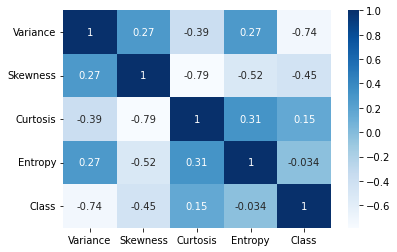

In [48]:
#Correlation between features
plt.figure(figsize = (6,4))
sns.heatmap(df[['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']].corr(),cmap="Blues",annot=True)
plt.show()

### Feature selection 

In [51]:
X = df[["Variance","Skewness","Curtosis","Entropy"]]
y = df["Class"]

## Modeling 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [49]:
#Using Linear regration
from sklearn.linear_model import LogisticRegression
linear = LogisticRegression()
linear.fit(X_train,y_train)
pred = linear.predict(X_test)
metrics.accuracy_score(y_test,pred)

0.9970326409495549

In [50]:
#Boosting the algorithm with adaboost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=linear ,n_estimators=50,learning_rate =1)
boostmodel =ada.fit(X_train,y_train)
y_prd = boostmodel.predict(X_test)
metrics.accuracy_score(y_test,y_prd)

1.0

In [26]:
import pickle

In [27]:
pickle.dump(boostmodel, open("model.pkl","wb"))

In [28]:
loded_model = pickle.load(open("model.pkl","rb"))

In [29]:
prediction = linear.predict(X_test) 

In [38]:
confusion_matrix(y_test,prediction)

array([[176,   1],
       [  0, 160]], dtype=int64)

In [39]:
accuracy_score(y_test,prediction)*100

99.70326409495549

# DEEPLEARNING

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers

In [44]:
X_test.shape

(337, 4)

In [45]:
an = models.Sequential([
    layers.Dense(4,input_shape =(4,),activation = "relu"),
    layers.Dense(5,activation = 'relu'),
    layers.Dense(10,activation = 'relu'),
    layers.Dense(5,activation = 'relu'),
    layers.Dense(2,activation = "sigmoid")
])
an.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = "accuracy"
)

an.fit(X_train,y_train,epochs = 20)

Epoch 1/20
32/32 [==============================] - 3s 8ms/step - loss: 0.5632 - accuracy: 0.6508
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.6993
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4432 - accuracy: 0.7953
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.3842 - accuracy: 0.8635
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.9021
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2803 - accuracy: 0.9258
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.9456
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1711 - accuracy: 0.9575
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1271 - accuracy: 0.9713
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0981 - accuracy: 0.9753
Epoch 11/20
32/32 [

In [46]:
an.evaluate(X_test,y_test)

11/11 [==============================] - 0s 0s/step - loss: 0.0123 - accuracy: 1.0000


[0.012278979644179344, 1.0]

## Using deep learning AN gives accuracy of 100